In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler


In [ ]:
df=pd.read_csv(r"E:\2022-2023 hk1\PTTK\CK\code\1-12-2017 1-12-2022\SSI Historical Data.csv")
df

,Date,Price,Open,High,Low,Vol.,Change %
0,12/1/2017,13928.5,13625.2,14105.5,13574.6,10420000.0,0.02
1,12/4/2017,14712.2,14054.9,14813.3,13979.1,11520000.0,0.06
2,12/5/2017,14257.2,14661.6,14712.2,14156.1,11100000.0,-0.03
3,12/6/2017,14130.8,14206.6,14257.2,13625.2,14660000.0,-0.01
4,12/7/2017,13701.0,14130.8,14156.1,13599.9,8850000.0,-0.03
...,...,...,...,...,...,...,...
1244,11/25/2022,17100.0,16400.0,17100.0,16150.0,22570000.0,0.07
1245,11/28/2022,18250.0,17500.0,18250.0,17500.0,32640000.0,0.07
1246,11/29/2022,18950.0,18500.0,19150.0,18000.0,32280000.0,0.04
1247,11/30/2022,19250.0,18700.0,19400.0,18450.0,29650000.0,0.02


In [ ]:
df['Date']=pd.to_datetime(df.Date,format='%m/%d/%Y')
df=df.set_index(pd.DatetimeIndex(df['Date'].values))

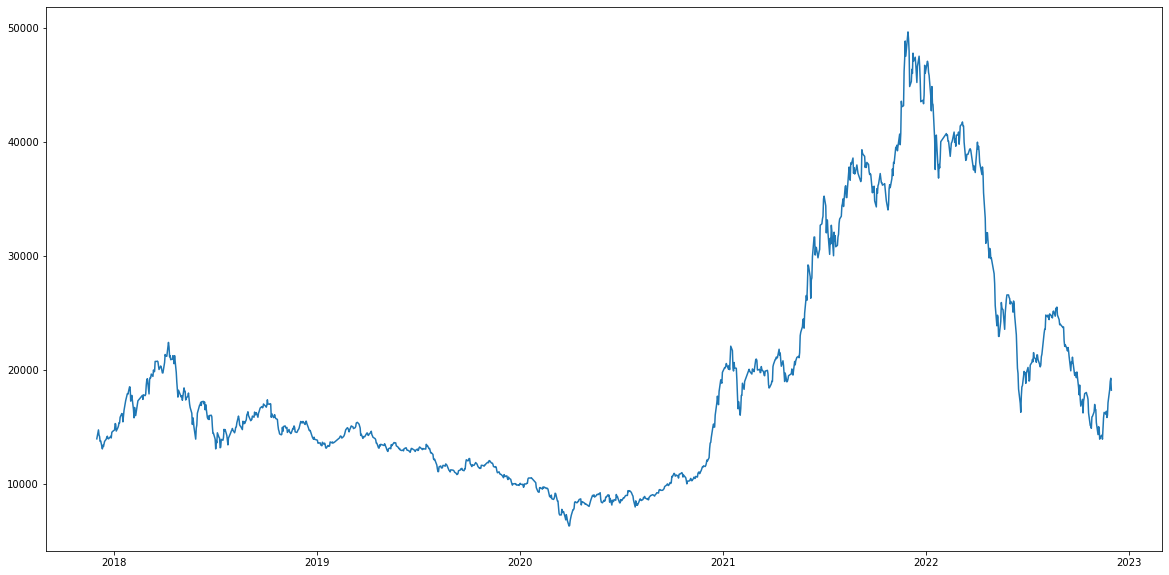

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(df['Price'])
plt.show()

In [ ]:
df.index = df.Date
df = pd.DataFrame(df, columns=['Price'])



In [ ]:
import math
data = df.values
t = math.ceil(len(df)* 0.7)
train_data = data[:t]
test_data = data[t:]

In [ ]:
sc = MinMaxScaler(feature_range=(0, 1))
sc_train = sc.fit_transform(data)
sc_train

array([[0.17657386],
       [0.19462959],
       [0.18414681],
       ...,
       [0.29226463],
       [0.29917635],
       [0.27498531]])

In [ ]:
x_train=[]
y_train=[]
for i in range(60, len(train_data)):
    x_train.append(sc_train[i-60:i, 0])
    y_train.append(sc_train[i, 0])
    
x_train = np.array(x_train)
y_train = np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

print('x_train shape == {}.'.format(x_train.shape))
print('y_train shape == {}.'.format(y_train.shape))

x_train shape == (815, 60, 1).
y_train shape == (815, 1).


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2
import tensorflow as tf

learning_rate = 0.0001
hidden_unit = 64
batch_size = 32
epoch = 100
model = Sequential()
model.add(LSTM(units=hidden_unit, return_sequences=True, input_shape =(x_train.shape[1],1), activation="relu"))
model.add(Dropout(0.2))
model.add(LSTM(units=hidden_unit, return_sequences=True,activation="relu"))
model.add(Dropout(0.2))
model.add(LSTM(units=hidden_unit, return_sequences=False,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),loss='mean_squared_error')
pred = model.fit(x_train, y_train ,batch_size=batch_size, epochs=epoch)

Epoch 1/100
26/26 [==============================] - 6s 57ms/step - loss: 0.0325
Epoch 2/100
26/26 [==============================] - 1s 55ms/step - loss: 0.0206
Epoch 3/100
26/26 [==============================] - 2s 60ms/step - loss: 0.0072
Epoch 4/100
26/26 [==============================] - 2s 58ms/step - loss: 0.0046
Epoch 5/100
26/26 [==============================] - 2s 76ms/step - loss: 0.0036
Epoch 6/100
26/26 [==============================] - 2s 60ms/step - loss: 0.0026
Epoch 7/100
26/26 [==============================] - 2s 59ms/step - loss: 0.0021
Epoch 8/100
26/26 [==============================] - 1s 53ms/step - loss: 0.0018
Epoch 9/100
26/26 [==============================] - 1s 54ms/step - loss: 0.0018
Epoch 10/100
26/26 [==============================] - 2s 61ms/step - loss: 0.0018
Epoch 11/100
26/26 [==============================] - 2s 91ms/step - loss: 0.0016
Epoch 12/100
26/26 [==============================] - 2s 69ms/step - loss: 0.0016
Epoch 13/100
26/26 [=====

In [ ]:
y_train = sc.inverse_transform(y_train)

y_train_predict = model.predict(x_train)

y_train_predict = sc.inverse_transform(y_train_predict)

In [ ]:
test = df[len(train_data)-60:].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

x_test = []
for i in range(60, test.shape[0]):
    x_test.append(sc_test[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

y_test = data[t:]

print('x_test shape == {}.'.format(x_test.shape))
print('y_test shape == {}.'.format(y_test.shape))

In [ ]:
y_test_predict = model.predict(x_test)
y_test_predict = sc.inverse_transform(y_test_predict)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
mae = mean_absolute_error(y_test, y_test_predict)
mape = mean_absolute_percentage_error(y_test, y_test_predict)
mse = mean_squared_error(y_test, y_test_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_predict)

print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape * 100:.2f}%")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

In [ ]:
test_data1 = df[t:]

plt.figure(figsize=(20,10))
plt.plot(df[t:], label='Annual price', color='r')
test_data1['pred'] = y_test_predict
plt.plot(test_data1['pred'], label='Test predict Price', color='b')
plt.title('Compare Predict Price and Annual Price')
plt.xlabel('Date')
plt.ylabel('Price OF SSI (VND)')
plt.legend()
plt.show()

In [ ]:
predictions_future = model.predict(x_test[-30:])

In [ ]:
predictions_future

In [ ]:
predict = sc.inverse_transform(predictions_future)
predict

In [ ]:
predict.shape

In [ ]:
datelist_future = pd.date_range(start="12/2/2022",end="12/31/2022")

In [ ]:
new_date=df.index.append(datelist_future)
new_date

In [ ]:
plt.rcParams['figure.figsize'] = [20, 10]
plt.plot(df.index, df['Price'], 'red', label="Original data")
plt.plot(datelist_future, predict, 'orange', label="Prediction data")
plt.axvline(x = min(datelist_future), color='green', linewidth=2, linestyle='--')
plt.legend(loc='upper left')
plt.xlabel('Date')
plt.ylabel('Price OF SSI (VND)')
plt.show()